# Colab code

In [2]:
if 'google.colab' in str(get_ipython()):
  # connect to the datasets
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  closed_eyes_dataset_path = "/content/drive/MyDrive/ATML_Project_202021/mrlEyes_2018_01"
else:
  closed_eyes_dataset_path = "mrlEyes_2018_01"
  xml_path = "haarcascade_xml/"

# Import required libraries

In [3]:
import numpy as np
import os
import cv2
from tensorflow import keras
#from google.colab.patches import cv2_imshow

# Dataset preparation

Reading the dataset

In [ ]:
images = []
labels = []
path = closed_eyes_dataset_path + "/s00"
for i in range (1,38):
  if i < 10:
    curr_path = path + "0" + str(i)
  else:
    curr_path = path + str(i)

  for filename in os.listdir(curr_path):
    img = cv2.imread(os.path.join(folder,filename))
    images.append(img)
    labels.append(filename.split("_")[4])
  


FileNotFoundError: ignored

# Eye-detection from images



In [4]:
face_cascade = cv2.CascadeClassifier(xml_path + "haarcascade_frontalface_alt.xml")
right_eye_cascade = cv2.CascadeClassifier(xml_path + "haarcascade_righteye_2splits.xml")
left_eye_cascade = cv2.CascadeClassifier(xml_path + "haarcascade_lefteye_2splits.xml")
#eyes_cascade = cv2.CascadeClassifier("/content/eye_glasses.xml")

In [100]:
img = cv2.imread("cremo_occhiali.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [101]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [102]:
for (x,y,w,h) in faces:
    #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    half_int = int(np.ceil(w/2))
    
    roi_gray_left = gray[y:y+h, x:x+half_int]
    roi_gray_right = gray[y:y+h, x+half_int:x+w]
    
    img = cv2.rectangle(img,(x,y),(x+half_int,y+h),(255,0,0),2)
    img = cv2.rectangle(img,(x+half_int,y),(x+w,y+h),(0,255,0),2)

    roi_color_left = img[y:y+h, x:x+half_int]
    roi_color_right = img[y:y+h, x+half_int:x+w]
    
    right_eyes = right_eye_cascade.detectMultiScale(roi_gray_left)
    left_eyes = left_eye_cascade.detectMultiScale(roi_gray_right)

In [79]:
right_eyes = right_eye_cascade.detectMultiScale(gray)
left_eyes = left_eye_cascade.detectMultiScale(gray)

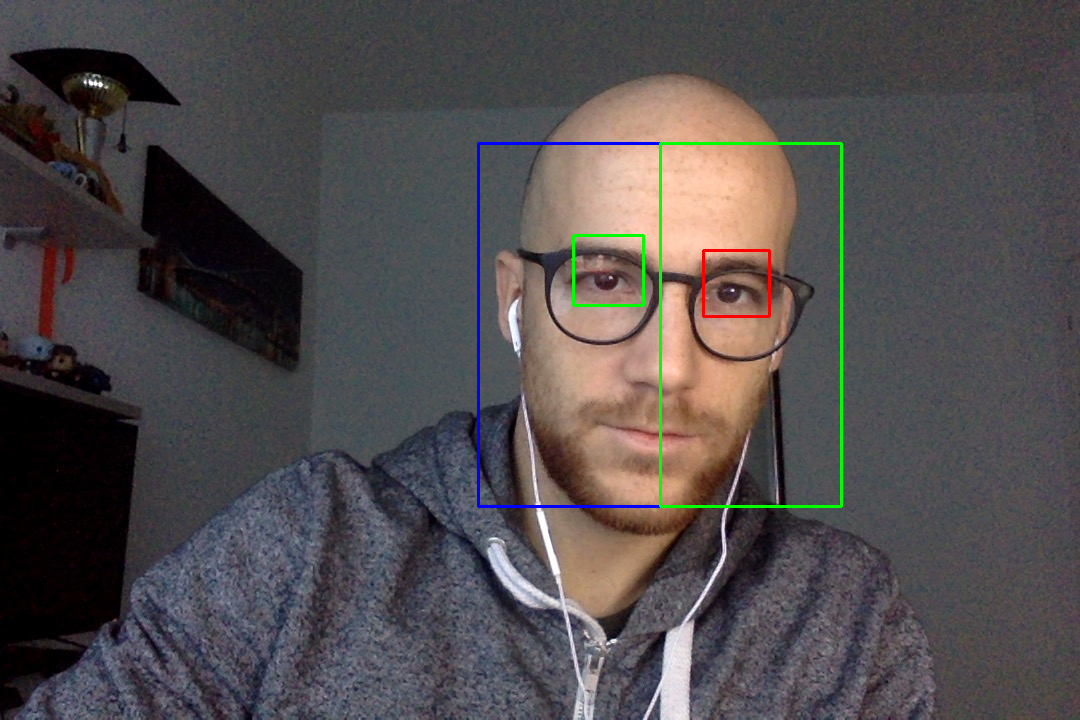

In [103]:
for (ex,ey,ew,eh) in right_eyes:
        cv2.rectangle(roi_color_left,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


for (ex,ey,ew,eh) in left_eyes:
        cv2.rectangle(roi_color_right,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

#(ex,ey,ew,eh) = left_eyes[0]
#cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## With video capture

In [16]:
cap = cv2.VideoCapture(0)

In [17]:
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    
    for (x,y,w,h) in faces:
        half_int = int(np.ceil(w/2))
    
        roi_gray_left = gray[y:y+h, x:x+half_int]
        roi_gray_right = gray[y:y+h, x+half_int:x+w]
    
        #img = cv2.rectangle(frame,(x,y),(x+half_int,y+h),(255,0,0),2)
        #img = cv2.rectangle(frame,(x+half_int,y),(x+w,y+h),(0,255,0),2)

        roi_color_left = frame[y:y+h, x:x+half_int]
        roi_color_right = frame[y:y+h, x+half_int:x+w]
    
        right_eyes = right_eye_cascade.detectMultiScale(roi_gray_left)
        left_eyes = left_eye_cascade.detectMultiScale(roi_gray_right)
        
        for (ex,ey,ew,eh) in right_eyes:
            cv2.rectangle(roi_color_left,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


        for (ex,ey,ew,eh) in left_eyes:
            cv2.rectangle(roi_color_right,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
    
    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined